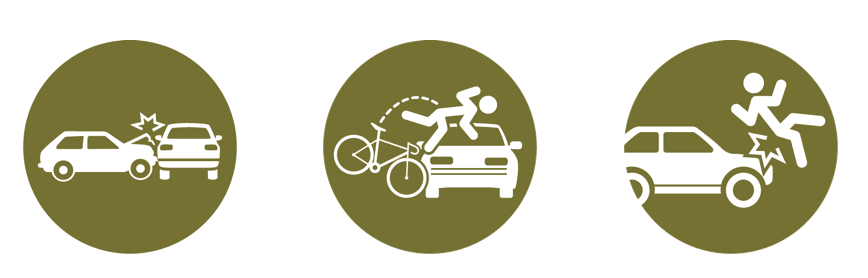

# Crash Data Week 1 (Bruce)


Do some wrangling of the ODOT crash data set and compute a few summary stats. We are especially interested in columns/parameters that might indicate cost or severity of a crash, e.g., collision type, number of vehicles, injuries, severity, number of people involved, property damage, etc. I also included a couple of very basic predictions just so that we can say that we predicted something.

In [3]:
import pandas as pd

counties = ['Clackamas','Washington', 'Multnomah']
#counties = ['Clackamas']

filenames = []
datdir = 'data'

ctydfs = []
for county in counties:
    filename = "data/" + county + ".csv"
    ctydfs.append(pd.read_csv(filename, low_memory=False))

# combine all of the counties into a single DataFrame
df = pd.concat(ctydfs)

print(str(df.shape[0]), " total rows over " + str(len(counties)) + " counties")


525219  total rows over 3 counties


In [4]:
df.head(n=5)

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 1 Code,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Striker Flag
0,1449644,1,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1449644,2,2741448.0,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1449644,3,2741448.0,3130975.0,2.0,02,1.0,NaN,NaN,NaN,...,0.0,,,,,,,0,0,0.0
3,1449644,3,2741448.0,3130976.0,3.0,02,2.0,NaN,NaN,NaN,...,0.0,,,,,,,,,0.0
4,1449644,2,2741447.0,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#split the data by record type and cut the empty columns
crashes = df.loc[df['Record Type'] == 1]
crashes = crashes.dropna(axis='columns', how='all')

# not planning to use the other two record types in this notebook
# but we will create DataFrames for them anyway
df_type2 = df.loc[df['Record Type'] == 2]
df_type2 = df_type2.dropna(axis='columns', how='all')

df_type3 = df.loc[df['Record Type'] == 3]
df_type3 = df_type3.dropna(axis='columns', how='all')

crashes.head(n=5)




,Crash ID,Record Type,Serial #,Crash Month,Crash Day,Crash Year,Week Day Code,Crash Hour,County Code,City Section ID,...,Total Pedalcyclist Fatality Count,Total Pedalcyclist Non-Fatal Injury Count,Total Unknown Non-Motorist Count,Total Unknown Non-Motorist Fatality Count,Total Unknown Non-Motorist Injury Count,Total Vehicle Occupant Count,Total Count of Persons Involved,Total Quantity of Persons Using Safety Equipment,Total Quantity of Persons Not Using Safety Equipment,"Total Quantity of Persons Safety Equipment ""Use Unknown"""
0,1449644,1,2.0,1.0,1.0,2012.0,1.0,13.0,3.0,160.0,...,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0
6,1449647,1,3.0,1.0,2.0,2012.0,2.0,13.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0
11,1449654,1,8.0,1.0,2.0,2012.0,2.0,7.0,3.0,138.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
15,1449660,1,9.0,1.0,2.0,2012.0,2.0,13.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0
20,1449670,1,12.0,1.0,3.0,2012.0,3.0,10.0,3.0,115.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0


In [6]:
#show all the columns related to the top-level crash records
list(crashes)

['Crash ID',
 'Record Type',
 'Serial #',
 'Crash Month',
 'Crash Day',
 'Crash Year',
 'Week Day Code',
 'Crash Hour',
 'County Code',
 'City Section ID',
 'Urban Area Code',
 'Functional Class Code',
 'NHS Flag',
 'Highway Number',
 'Highway Suffix',
 'Roadway Number',
 'Highway Component',
 'Mileage Type',
 'Connection Number',
 'Linear Reference System (LRS)',
 'Latitude Degrees',
 'Latitude Minutes',
 'Latitude Seconds',
 'Longitude Degrees',
 'Longitude Minutes',
 'Longitude Seconds',
 'Special Jurisdiction',
 'Jurisdiction Group',
 'Street Number',
 'Nearest Intersecting Street Number',
 'Intersection Sequence Number',
 'Distance from Intersection',
 'Direction From Intersection',
 'Milepoint',
 'Posted Speed Limit',
 'Road Character',
 'Off Roadway Flag',
 'Intersection Type',
 'Intersection Related Flag',
 'Roundabout Flag',
 'Driveway Related Flag',
 'Number of Lanes',
 'Number of Turning Legs',
 'Median Type',
 'Impact Location',
 'Crash Type',
 'Collision Type',
 'Crash Sev

For this summarization of the data we are interested in a few of the columns, i.e., the ones related to severity of the crash, such as
 ['Impact Location',
 'Crash Type',
 'Collision Type',
 'Crash Severity',
 'Total Vehicle Count',
 'Total Fatality Count',
 'Total Serious Injury (Inj-A) Count',
 'Total Moderate Injury (Inj-B) Count',
 'Total Minor Injury (Inj-C) Count',
 'Total Non-Fatal Injury Count',
 'Total Count of Un-Injured  Children Age 00-04',
 'Total Count of Un-Injured Persons',
 'Total Pedestrian Count',
 'Total Pedestrian Fatality Count',
 'Total Pedestrian Non-Fatal Injury Count',
 'Total Pedalcyclist Count',
 'Total Pedalcyclist Fatality Count',
 'Total Pedalcyclist Non-Fatal Injury Count',
 'Total Unknown Non-Motorist Count',
 'Total Unknown Non-Motorist Fatality Count',
 'Total Unknown Non-Motorist Injury Count',
 'Total Vehicle Occupant Count',
 'Total Count of Persons Involved',
 'Total Quantity of Persons Using Safety Equipment  ',
 'Total Quantity of Persons Not Using Safety Equipment',
 'Total Quantity of Persons Safety Equipment "Use Unknown"']

In [9]:
# the first summary stat
print ("Total # of Crashes: " + str(crashes.shape[0]))

Total # of Crashes: 101119


In [10]:
#summarize the time span of the data
import datetime

# without the next three lines pandas treats these columns as floats which is not good
# not sure why it does this, they appear to be ints in the data files
# also not sure if there is a better way to handle this
crashes['Crash Month'] = crashes['Crash Month'].astype(int)
crashes['Crash Day'] = crashes['Crash Day'].astype(int)
crashes['Crash Year'] = crashes['Crash Year'].astype(int)

# clean up the dates
# the data files split the dates into month, day and year which is not very useful
# so this code joins these fields and creates a "Date" field
def to_datetime (row):
    month=row['Crash Month']
    day=row['Crash Day']
    year=row['Crash Year']
    dstr = str(month)+"/"+str(day)+"/"+str(year)
    dt = datetime.datetime.strptime(dstr, "%m/%d/%Y").date()
    return(dt)

crashes['Date'] = crashes.apply(to_datetime, axis=1)

print("Starting date for data set: ", crashes['Date'].min())
print("Ending date for data set: ", crashes['Date'].max())

Starting date for data set:  2012-01-01
Ending date for data set:  2015-12-31


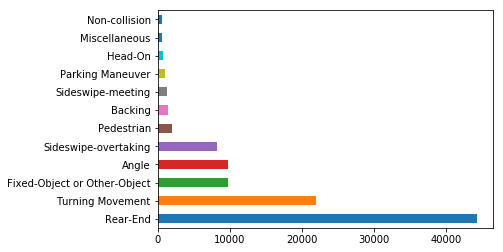

In [12]:
# summarize the collision type attribute with a chart
# I created this lookup table manually, not sure if there is a more automated way to do it
collision_replacements = {'1':'Angle', '2': 'Head-On', '3':'Rear-End', '4':'Sideswipe-meeting', '5':'Sideswipe-overtaking', 
                   '6':'Turning Movement', '7':'Parking Maneuver', '8':'Non-collision', '9':'Fixed-Object or Other-Object', 
                   '0':'Pedestrian', '-':'Backing', '&':'Miscellaneous'}
                          
crashes['Collision Type'] = crashes['Collision Type'].replace(collision_replacements)

counts = crashes['Collision Type'].value_counts()
counts.plot(kind='barh')


In [13]:
# here's a nice, safe prediction that probably nobody will dispute
print ("PREDICTION: in 2016 '" + counts.index[0] + 
       "' will be the most common type of collision")

PREDICTION: in 2016 'Rear-End' will be the most common type of collision


In [14]:
# summarize the collision type with a chart
# again, I created these replacements by hand based on the information I read in the 'CDS Code Translate' spreadsheet
severity_replacements = {2: 'Fatal', 4:'Injuries', 5:'Property Damage Only'}
                          
crashes['Crash Severity'] = crashes['Crash Severity'].replace(severity_replacements)

counts = crashes['Crash Severity'].value_counts()

# print a summary table of Crash Severities
counts


Property Damage Only    50724
Injuries                50059
Fatal                     336
Name: Crash Severity, dtype: int64

In [15]:
# here's another simple prediction
print ("PREDICTION: in 2016 most collisions will not be '" + counts.index[-1] + "'")

PREDICTION: in 2016 most collisions will not be 'Fatal'


In [37]:
# next, lets look at injuries per crash
crashes['Total Non-Fatal Injury Count'].describe()


count    101119.000000
mean          0.703636
std           0.913789
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          25.000000
Name: Total Non-Fatal Injury Count, dtype: float64

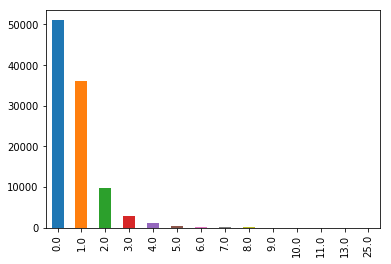

In [23]:
counts = crashes['Total Non-Fatal Injury Count'].value_counts()
counts.plot(kind='bar')

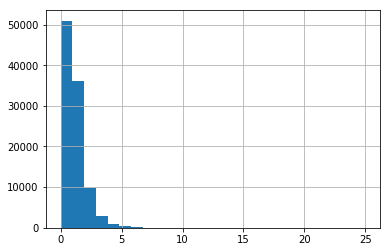

In [30]:
crashes['Total Non-Fatal Injury Count'].hist(bins=26)

In [46]:
series = crashes['Total Non-Fatal Injury Count']
print ("mean:", series.mean())
print ("median:", series.median())
print ("mad:", series.mad())
print ("std:", series.std())
print ("mode:", series.mode())
print ("max:", series.max())
print ("min:", series.min())
print ("quant75:", series.quantile(.75))


mean: 0.7036363096945183
median: 0.0
mad: 0.7089456432945507
std: 0.9137889876653629
mode: 0    0.0
dtype: float64
max: 25.0
min: 0.0
quant75: 1.0


In [51]:
# One more simple prediction
most = series.quantile(.75)
print ("PREDICTION: in 2016 most crashes involving injuries will have at most", 
       round(most), ("injury" if (most == 1) else "injuries"))

PREDICTION: in 2016 most crashes involving injuries will have at most 1 injury


In [53]:
series = crashes['Total Count of Un-Injured Persons']
series.describe()

count    101119.000000
mean          1.870707
std           1.298128
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: Total Count of Un-Injured Persons, dtype: float64

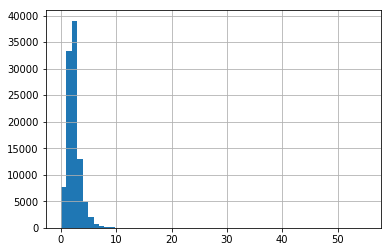

In [67]:
series.hist(bins=round(series.max()+1).astype(int))

In [68]:
series = crashes['Total Count of Persons Involved']
series.describe()

count    101119.000000
mean          2.577814
std           1.342838
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          55.000000
Name: Total Count of Persons Involved, dtype: float64

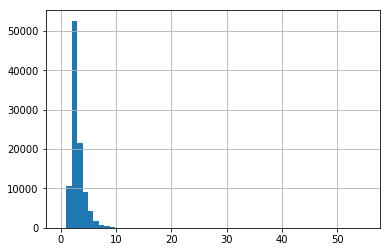

In [69]:
series.hist(bins=round(series.max()+1).astype(int))

In [70]:
most = series.quantile(.75)
print ("PREDICTION: in 2016 most crashes will have at most", 
       round(most), ("person" if (most == 1) else "people"), "total involved")

PREDICTION: in 2016 most crashes will have at most 3 people total involved
